# Importing libraries

In [4]:
!pip install scikit-learn

     ---------------------------------------- 7.4/7.4 MB 9.6 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     --------------------------------------- 40.1/40.1 MB 12.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# Downloading and importing Dataset

In [7]:
df=pd.read_csv('Churn_Modelling.csv')
df=df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Visualization

### Unvariable Analysis

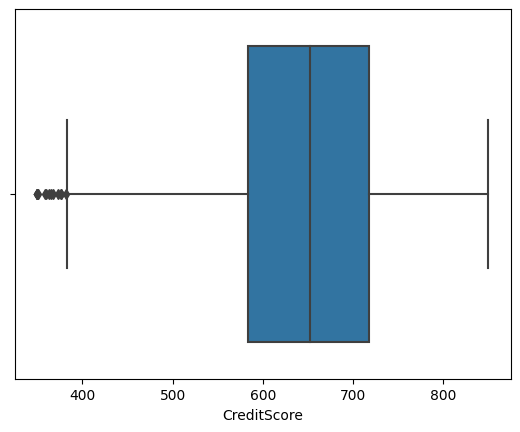

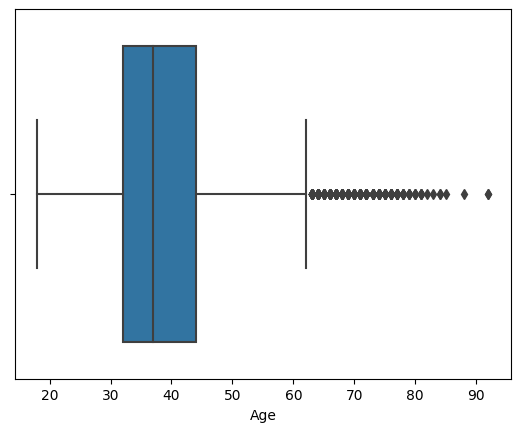

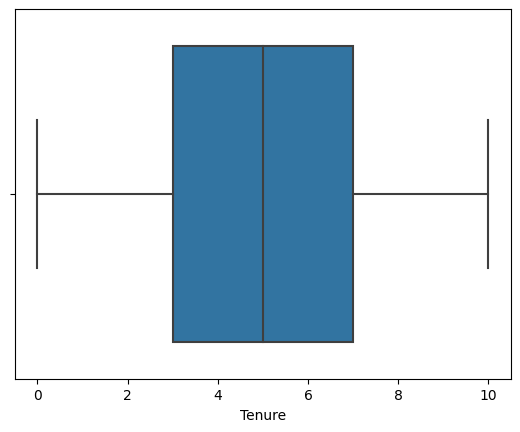

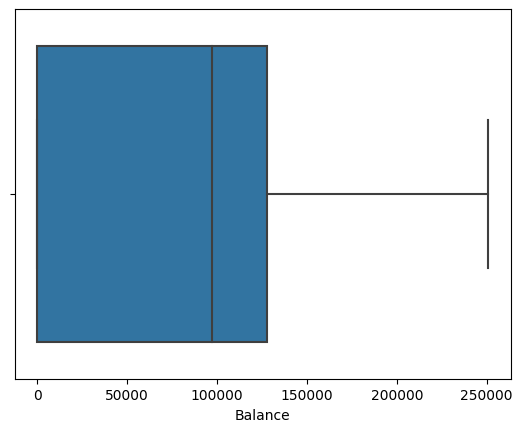

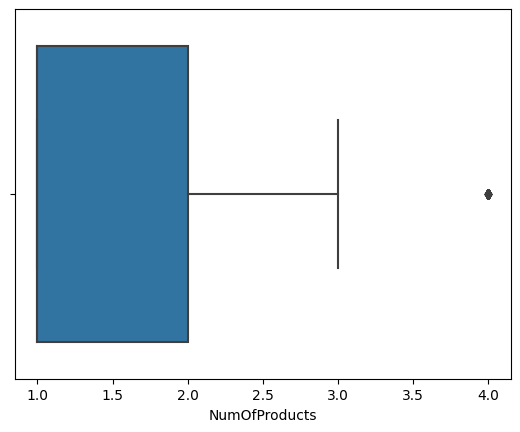

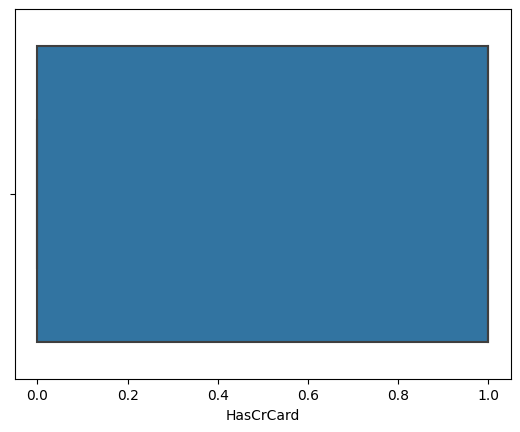

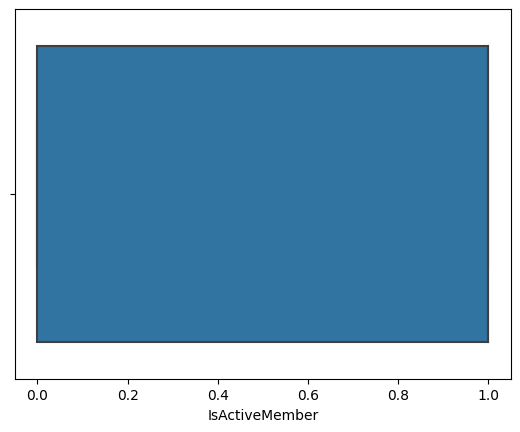

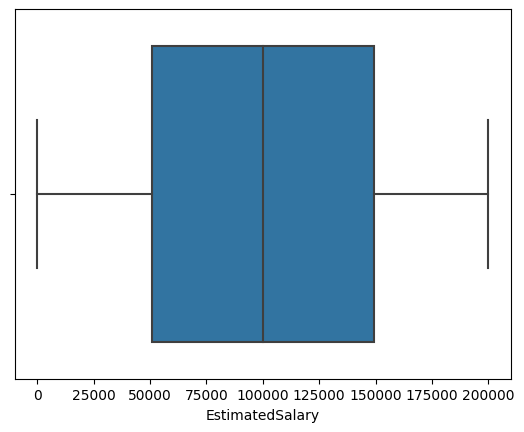

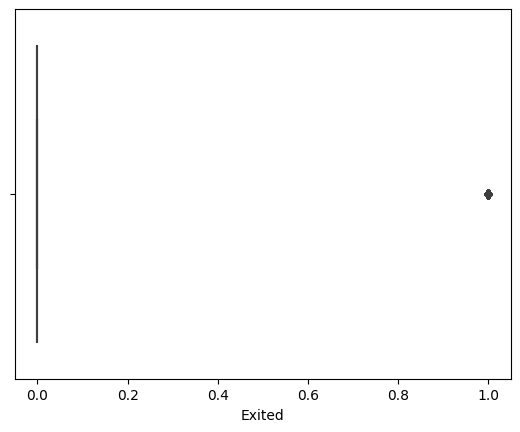

In [8]:
for col in df.columns:
  if(df.dtypes[col]=='int64' or df.dtypes[col]=='float64'):
    sns.boxplot(x=df[col]).set(xlabel=col)
    plt.show()

### Bivariate Analysis

C:\Users\nagul\.conda\envs\nagulfyrprjct\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nagul\.conda\envs\nagulfyrprjct\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


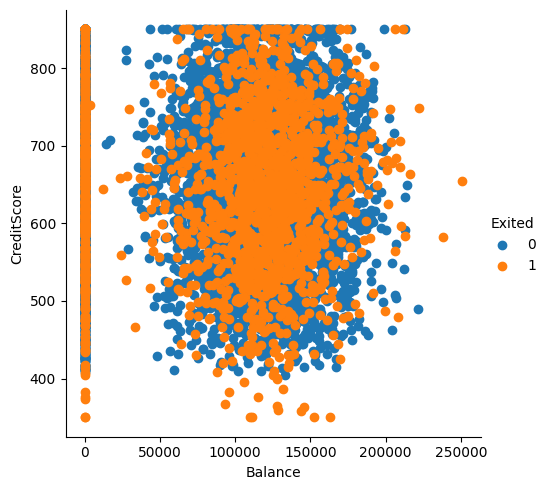

In [9]:
sns.FacetGrid(df,hue='Exited',height=5).map(plt.scatter,"Balance","CreditScore").add_legend()
plt.show()

### Multivariate

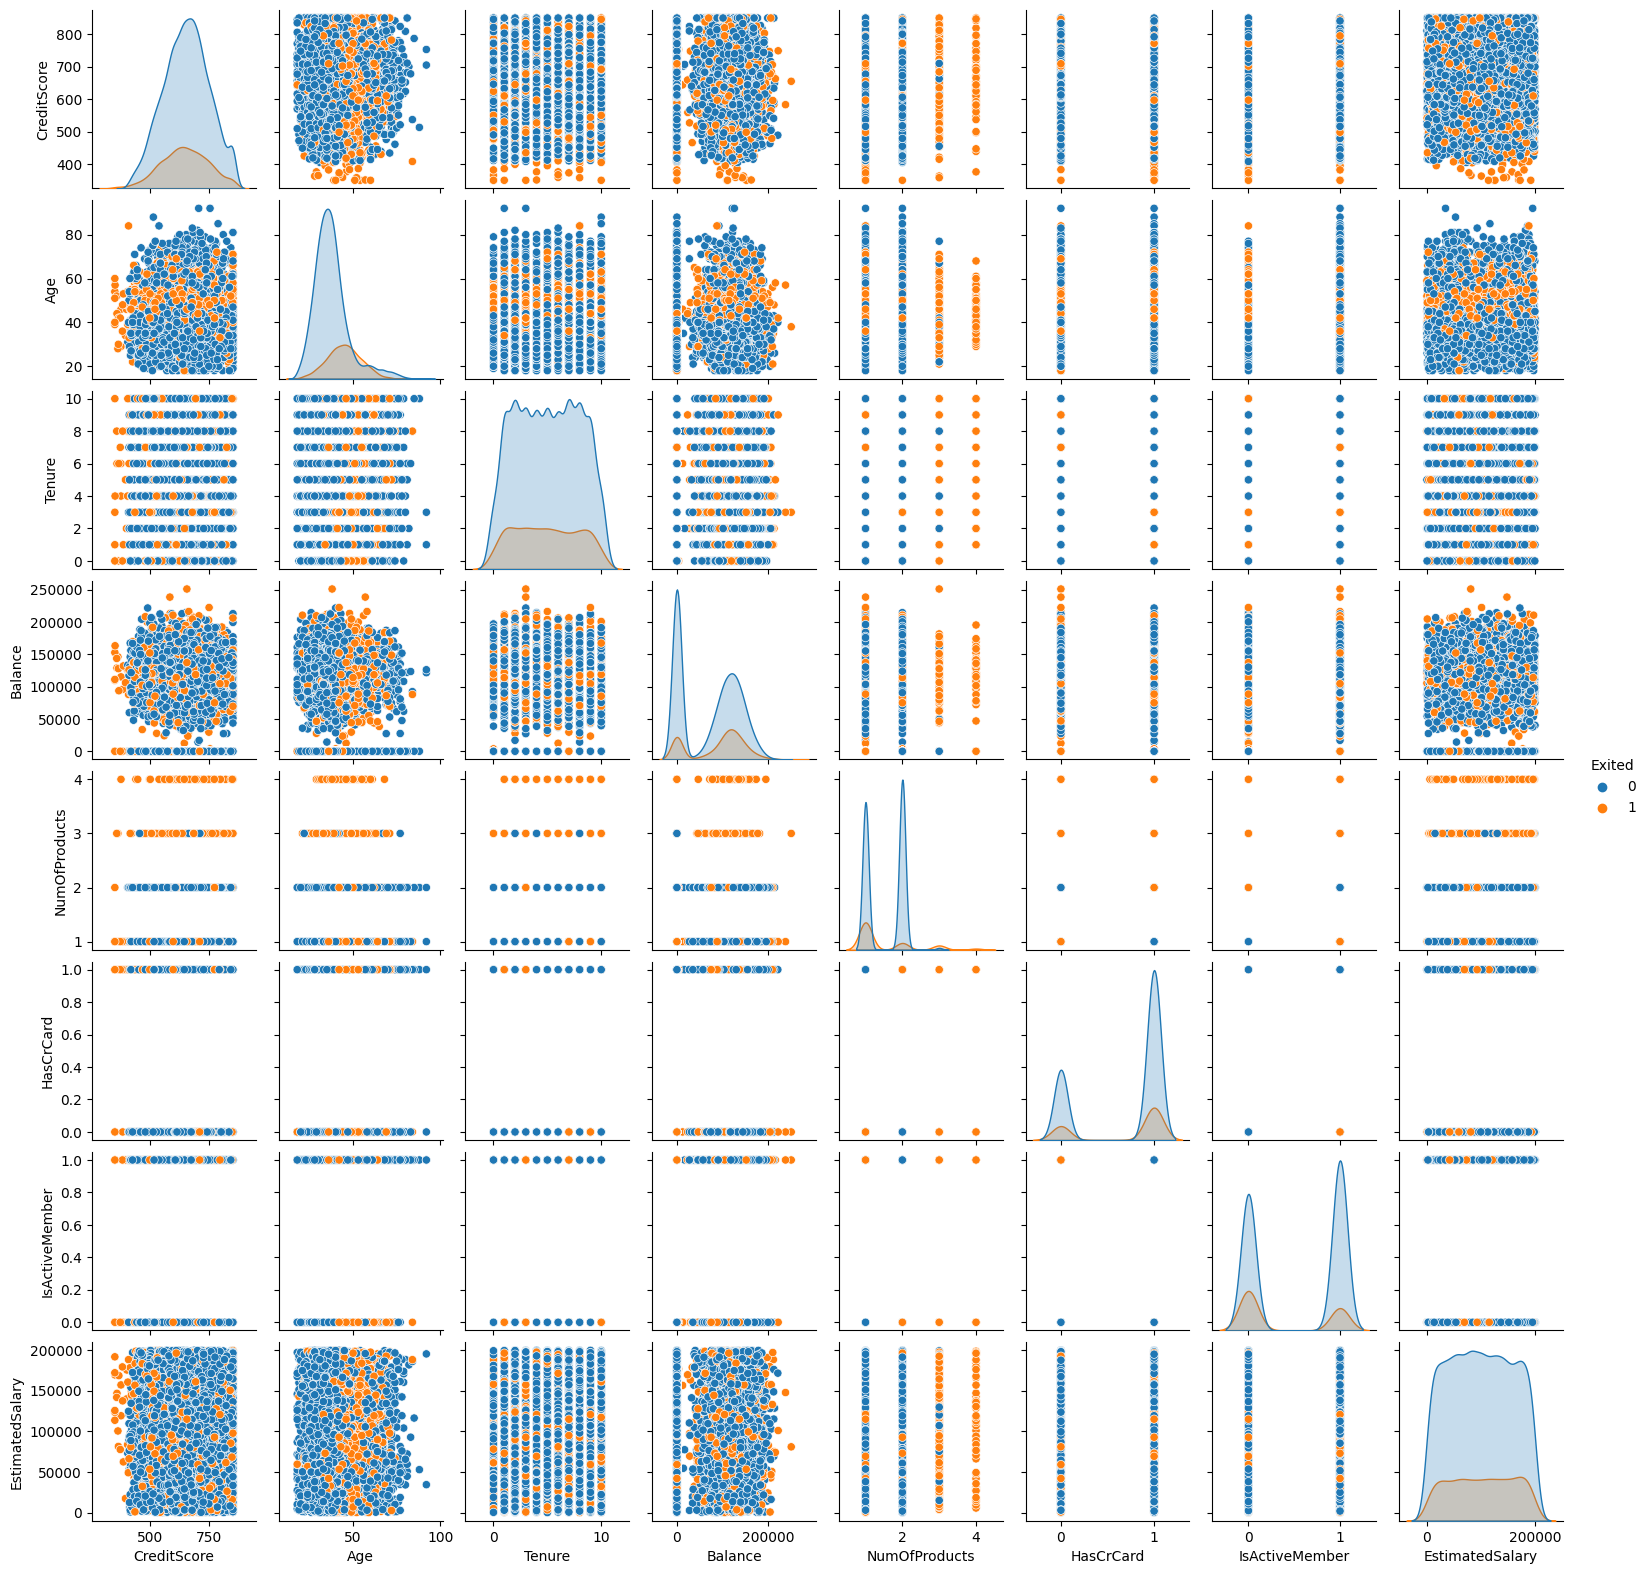

In [11]:
sns.pairplot(df, hue='Exited', height=2);

### Descriptive Analysis

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Handling Missing Values

#### There is no null values, so this task is skipped

In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Finding and Removing the Outliers

#### Outliers are found using the Univariate BOXPLOT from Task 3

In [14]:
CreditsMedian=df.loc[df['CreditScore']<400,'CreditScore'].median()
ProdMedian=df.loc[df['NumOfProducts']>=3.5,'NumOfProducts'].median()
df.loc[df.CreditScore<400,'CreditScore']=np.nan
df.fillna(CreditsMedian,inplace=True)
df.loc[df.NumOfProducts>3,'NumOfProducts']=np.nan
df.fillna(ProdMedian,inplace=True)

### Label Encoding(Categorical)

In [15]:
labelencoder=LabelEncoder()
df['Geography']=labelencoder.fit_transform(df['Geography'])
df['Gender']=labelencoder.fit_transform(df['Gender'])

### Seperating Dependent and Independent Values

In [16]:
ind=df.iloc[:,:-1]
dep=df.iloc[:,-1:]

### Scaling the Independent Variables

In [17]:
nm=MinMaxScaler()
N_ind=nm.fit_transform(ind)

### Splitting the train and test data

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(N_ind,dep,test_size=0.3)
print(xtrain,xtest,ytrain,ytest)

[[0.4742268  0.         1.         ... 1.         0.         0.95001213]
 [0.40412371 0.         1.         ... 0.         0.         0.09256549]
 [0.63092784 1.         1.         ... 1.         0.         0.70255849]
 ...
 [0.40824742 1.         1.         ... 0.         0.         0.08154769]
 [0.39175258 0.         1.         ... 1.         0.         0.85259457]
 [0.77113402 0.         0.         ... 0.         0.         0.61302284]] [[0.48865979 0.         1.         ... 1.         1.         0.38705131]
 [0.69278351 1.         0.         ... 1.         0.         0.57825047]
 [0.75670103 1.         0.         ... 0.         1.         0.55465627]
 ...
 [0.59381443 1.         0.         ... 1.         1.         0.16690514]
 [0.73195876 0.         0.         ... 1.         0.         0.86281335]
 [0.56907216 0.         1.         ... 1.         1.         0.65455851]]       Exited
1109       0
9370       1
4106       0
647        0
3697       0
...      ...
9849       0
3922    